# 使用xlwings套件
> 讀取檔案 <code>lab9.xlsx</code>

In [1]:
import xlwings as xw
import numpy as np
wb = xw.Book('lab9.xlsx')

### 讀取資料S_small和S_large

In [2]:
sht = wb.sheets[0]
S_small=np.zeros(9)
S_large=np.zeros(9)
for i in range(0,9):
    S_small[i]=sht.cells(i+30,'F').value
    S_large[i]=sht.cells(i+30,'G').value
    
print(S_small)
print(S_large)

[1.25 1.25 1.35 1.45 1.55 1.55 1.65 1.95 2.15]
[2.15 2.15 2.25 2.45 2.6  2.65 2.95 3.4  3.85]


### 計算𝛼
> $\alpha = \frac{S}{R}$

In [3]:
R = 6.5
Delta = 0.5
l_small=np.zeros(9)
l_large=np.zeros(9)
l_small = S_small/R
l_large = S_large/R
print(l_small)
print(l_large)

[0.19230769 0.19230769 0.20769231 0.22307692 0.23846154 0.23846154
 0.25384615 0.3        0.33076923]
[0.33076923 0.33076923 0.34615385 0.37692308 0.4        0.40769231
 0.45384615 0.52307692 0.59230769]


### 計算𝜃
> $tan2\theta = \frac{Rsin\alpha}{\Delta+R+Rcos\alpha}$

In [4]:
l_small = 0.5*np.arctan((R*np.sin(l_small))/(Delta+R+R*np.cos(l_small)))
l_large = 0.5*np.arctan((R*np.sin(l_large))/(Delta+R+R*np.cos(l_large)))
print(l_small)
print(l_large)

[0.0462908  0.0462908  0.04999307 0.05369511 0.0573969  0.0573969
 0.06109843 0.07220123 0.07960144]
[0.07960144 0.07960144 0.08330099 0.09069888 0.09624618 0.09809505
 0.10918572 0.12581255 0.14242666]


### 計算𝜆
> $sin\theta/\lambda = n/ 2d$

In [5]:
l=(2*0.213*np.sin(l_small)+2*0.123*np.sin(l_large))/2
print(l)

[0.01963706 0.01963706 0.02087826 0.02257224 0.02403884 0.02426518
 0.02640904 0.03079965 0.03439652]


### 計算理論𝜆
> $\lambda_{th} = h/p=1.23/\sqrt{V}$

In [6]:
sht = wb.sheets[0]
l_th= np.zeros(9)
for i in range(0,9):
    l_th[i] =1.23/np.sqrt(sht.cells(i+30,'A').value)
print(l_th)

[0.01658532 0.01739483 0.01833576 0.01944801 0.02079079 0.02245662
 0.0246     0.02750364 0.03175846]


### User-defined function

In [7]:
def process(S_s, S_l, R_pro, Delta_pro):
    #R_pro = 6.5
    #Delta_pro = 0.5
    l_s=np.zeros(9)
    l_l=np.zeros(9)
    l_s = S_s/R_pro
    l_l = S_l/R_pro
    l_s = 0.5*np.arctan((R_pro*np.sin(l_s))/(Delta_pro+R_pro+R_pro*np.cos(l_s)))
    l_l = 0.5*np.arctan((R_pro*np.sin(l_l))/(Delta_pro+R_pro+R_pro*np.cos(l_l)))
    l=(2*0.213*np.sin(l_s)+2*0.123*np.sin(l_l))/2
    return l
lll=process(S_small, S_large, 6.5, 0.5)
print(lll)
bias = np.sum(lll-l_th)
print("bias=",bias)

[0.01963706 0.01963706 0.02087826 0.02257224 0.02403884 0.02426518
 0.02640904 0.03079965 0.03439652]
bias= 0.023760423971711644


In [8]:
R = 6.5
Delta = 0.5
fit = np.zeros((2001,2001))
for Rp in range(1, 2001):
    for Deltap in range(1,2001):
        fit[Rp][Deltap] = np.sum(process(S_small, S_large, R*Rp/1000, Delta*Deltap/1000)-l_th)

In [13]:
R_f=1
D_f=1
cmp=np.absolute(fit[1][1])
for Rp in range(1, 2001):
    for Deltap in range(1,2001):
        if(cmp>np.absolute(fit[Rp][Deltap])):
            cmp=np.absolute(fit[Rp][Deltap])
            R_f = Rp
            D_f = Deltap
print("best=",R_f/1000,D_f/1000)

best= 1.119 1.142


(1200,)
(1200,)
(1200, 1200)


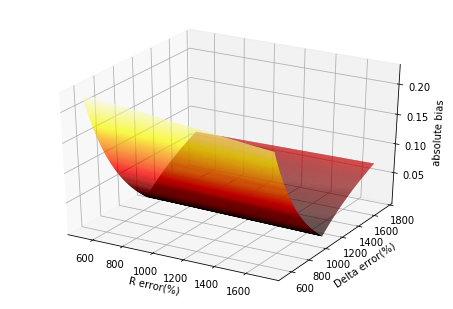

In [66]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
rag=600
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-rag+R_f, rag+R_f, 1)
print(X.shape)
Y = np.arange(-rag+D_f, rag+D_f, 1)
print(Y.shape)
X, Y = np.meshgrid(X, Y)
Z = np.absolute(fit)
print(Z[-rag+R_f:rag+R_f,-rag+D_f:rag+D_f].shape)
ax.plot_surface(X, Y, Z[-rag+R_f:rag+R_f,-rag+D_f:rag+D_f], rstride=1, cstride=1, cmap=plt.cm.hot)
ax.set_zlabel('absolute bias')  
ax.set_ylabel('Delta error(%)')
ax.set_xlabel('R error(%)')
plt.show()

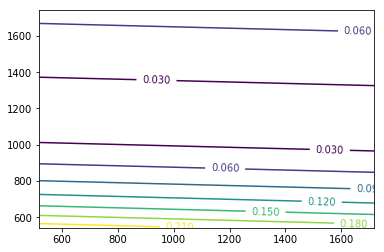

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
rag=600
fig = plt.figure()
X = np.arange(-rag+R_f, rag+R_f, 1)
Y = np.arange(-rag+D_f, rag+D_f, 1)
X, Y = np.meshgrid(X, Y)
Z = np.absolute(fit)

fig=plt.figure()

bx=fig.add_subplot(111)#再生成一個字圖

C=bx.contour(X,Y,Z[-rag+R_f:rag+R_f,-rag+D_f:rag+D_f]) #如果想要在等高線上標出相應的值，需要重新生成一個物件，不能是3d物件
bx.clabel(C,inline=True,fontsize=10) #在等高線上標出對應的z值
plt.show()